<a href="https://colab.research.google.com/github/vikassalaria2412/Deep-Learning/blob/master/capstone_sample_notebook_interim_final_Copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
project_path="/content/drive/My Drive/CapstoneProjectMainData/"
df=pd.read_excel(project_path +'input_data.xlsx')

# View First 5 records of DataSet

In [3]:
df.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


# Information about data.i.e datatypes,number of records,column names

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


# Column names in Dataset

In [5]:
df.keys()

Index(['Short description', 'Description', 'Caller', 'Assignment group'], dtype='object')

# Shape of the Data

In [6]:
df.shape


(8500, 4)

# Unique  Groups 

In [7]:
df["Assignment group"].nunique()

74

# Unique,Top,Freq  Records

In [8]:
df.describe()

,Short description,Description,Caller,Assignment group
count,8492,8499,8500,8500
unique,7481,7817,2950,74
top,password reset,the,bpctwhsn kzqsbmtp,GRP_0
freq,38,56,810,3976


# Finding Null,NaN values

In [9]:
df.isnull().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

In [10]:
df.isna().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

# Replacing Null Values

In [11]:
def ReplaceNanValues(text):
   text.dropna(inplace=True)
   return text

In [12]:
df_copy=df.copy()

In [13]:
ReplaceNanValues(df_copy)

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0
...,...,...,...,...
8495,emails not coming in from zz mail,\r\n\r\nreceived from: avglmrts.vhqmtiua@gmail...,avglmrts vhqmtiua,GRP_29
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0
8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0
8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62


In [14]:
df_copy.isnull().sum()
# No null values left

Short description    0
Description          0
Caller               0
Assignment group     0
dtype: int64

In [15]:
df_copy.shape

(8491, 4)

# Dupes in Dataset

In [16]:
# Finding the duplicates data.
df_copy=df_copy.astype(str)
duplicateRowsDf_copy=df_copy[df_copy.duplicated()]
print(duplicateRowsDf_copy)
print(duplicateRowsDf_copy.sum())


                                      Short description  ... Assignment group
51                           call for ecwtrjnq jpecxuty  ...            GRP_0
229                          call for ecwtrjnq jpecxuty  ...            GRP_0
493                     ticket update on inplant_872730  ...            GRP_0
512                                    blank call //gso  ...            GRP_0
667   job bkbackup_tool_powder_prod_full failed in j...  ...            GRP_8
...                                                 ...  ...              ...
7836             probleme mit erpgui \tmqfjard qzhgdoua  ...           GRP_24
8051               issue on pricing in distributor_tool  ...           GRP_21
8093  reset passwords for prgthyuulla ramdntythanjes...  ...           GRP_17
8347                           blank call // loud noise  ...            GRP_0
8405                           unable to launch outlook  ...            GRP_0

[83 rows x 4 columns]
Short description    call for ecwtrjnq jp

# Removing Dupes

In [17]:
# Writing function to remove Dupes
def RemoveDupes(text):
  text.drop_duplicates(['Short description', 'Description', 'Caller', 'Assignment group'],inplace=True)
  return text

In [18]:
RemoveDupes(df_copy)

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0
...,...,...,...,...
8495,emails not coming in from zz mail,\r\n\r\nreceived from: avglmrts.vhqmtiua@gmail...,avglmrts vhqmtiua,GRP_29
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0
8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0
8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62


In [19]:
df_copy.duplicated().sum()

0

# Merging Short Description and Description

In [20]:
# Merging Short Desc and Description
df_copy["Combined Description"] = df_copy["Short description"].astype(str) + ' ' + df_copy["Description"].astype(str)

In [21]:
df_copy.head()

,Short description,Description,Caller,Assignment group,Combined Description
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn \r\n\r\nreceived from: eylq...
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error


# Grouping Assignment Group Column

In [22]:
df_grp=df_copy.groupby(['Assignment group']).size().reset_index(name='counts')

# Top 20 Groups

In [23]:
df_grp.sort_values(by='counts',ascending=False)[:20]

,Assignment group,counts
0,GRP_0,3926
72,GRP_8,645
17,GRP_24,285
4,GRP_12,257
73,GRP_9,252
12,GRP_2,241
11,GRP_19,215
23,GRP_3,200
56,GRP_6,183
5,GRP_13,145


# Bottom 20 groups

In [24]:
df_grp.sort_values(by='counts',ascending=False)[-20:]

,Assignment group,counts
41,GRP_46,6
38,GRP_43,5
63,GRP_66,4
26,GRP_32,4
32,GRP_38,3
65,GRP_68,3
60,GRP_63,3
54,GRP_58,3
52,GRP_56,3
53,GRP_57,2


# Groups With Count<50

In [25]:
df_grp_CountLessThan50 = df_grp[df_grp['counts']<50]


In [26]:
df_grp_CountLessThan50

,Assignment group,counts
1,GRP_1,31
3,GRP_11,30
7,GRP_15,38
13,GRP_20,36
14,GRP_21,28
15,GRP_22,31
16,GRP_23,25
20,GRP_27,18
21,GRP_28,44
24,GRP_30,39


In [27]:
df_grp_CountLessThan50.shape

(50, 2)

# Plotting Group Ticket Assignment freq

(array([72.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1.0000e+00, 3.9350e+02, 7.8600e+02, 1.1785e+03, 1.5710e+03,
        1.9635e+03, 2.3560e+03, 2.7485e+03, 3.1410e+03, 3.5335e+03,
        3.9260e+03]),
 <a list of 10 Patch objects>)

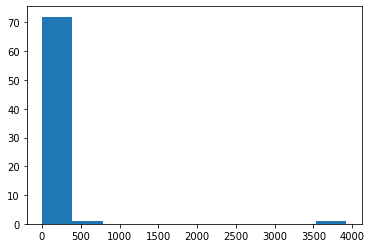

In [28]:
import matplotlib.pyplot as plt

plt.hist(df_grp['counts'])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


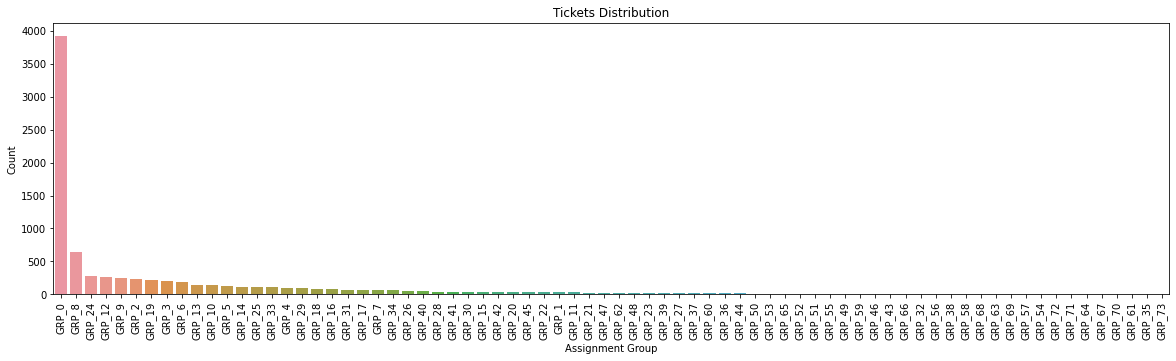

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplots(figsize = (20,5))

sns.countplot(x='Assignment group', data=df_copy,order = df_copy['Assignment group'].value_counts().index)
plt.xlabel('Assignment Group') 
plt.ylabel('Count') 
plt.xticks(rotation=90)
plt.title('Tickets Distribution')

plt.show()

In [30]:
df_grp.describe()

,counts
count,74.000000
mean,113.621622
std,459.823990
min,1.000000
25%,5.250000
50%,26.000000
75%,81.000000
max,3926.000000


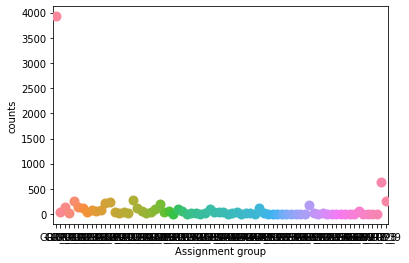

In [31]:
sns.swarmplot(x=df_grp['Assignment group'], y=df_grp['counts'], data=df_grp,size=10)

# Word Count In Data Set

In [32]:
df_copy['word_counts']=df_copy['Combined Description'].apply(lambda x :len(str(x).split()))

# Char Count

In [33]:
df_copy['char counts']=df_copy['Combined Description'].apply(lambda x : len(x))

In [34]:
df_copy.head()

,Short description,Description,Caller,Assignment group,Combined Description,word_counts,char counts
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...,35,218
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...,26,202
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn \r\n\r\nreceived from: eylq...,16,106
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,10,59
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,4,25


# Stop Words

In [35]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [36]:
print(STOP_WORDS)

{'have', 'several', 'and', 'thereupon', 'towards', 'mostly', 'which', 'five', 'with', 'together', 'we', 'hereby', 'all', 'or', 'either', 'ourselves', 'many', 'under', 'off', 'for', 'but', 'whenever', 'after', 'must', 'their', 'call', 'another', 'beforehand', 'some', 'should', 'everyone', "'ve", '’s', 'your', 'noone', 'used', 'up', 'him', 'between', 'formerly', 'perhaps', 'such', 'anyone', 'thru', 'much', 'sixty', 'did', 'across', 'amount', 'about', 'become', 'seeming', 'first', 'thereby', "n't", '’d', 'not', 'others', 'any', 'those', 'still', 'through', 'from', 'became', 'four', 'nevertheless', 'so', 'how', 'only', 'every', 'bottom', 'per', 'anyway', 'take', 'behind', '‘d', 'around', 'least', 'thence', 'anyhow', 'along', 'until', 'made', '’ve', 'out', "'d", 'also', 'besides', 'due', 'down', 'throughout', 'same', 'whatever', 'ever', 'twenty', "'re", 'fifty', 'ten', 'serious', 'six', 'hereafter', 'our', 'somehow', 'why', 'thus', 'go', 'each', 'otherwise', 'doing', '’ll', 'yours', 'my', '

In [37]:
df_copy['stop_words_len']=df_copy['Combined Description'].apply(lambda x : len([t for t in x.split() if t in STOP_WORDS]))

In [38]:
df_copy.head(5)

,Short description,Description,Caller,Assignment group,Combined Description,word_counts,char counts,stop_words_len
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...,35,218,12
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...,26,202,9
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn \r\n\r\nreceived from: eylq...,16,106,6
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,10,59,2
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,4,25,0


In [39]:
df_copy['stop_words']=df_copy['Combined Description'].apply(lambda x : [t for t in x.split() if t in STOP_WORDS])

In [40]:
df_copy.head()

,Short description,Description,Caller,Assignment group,Combined Description,word_counts,char counts,stop_words_len,stop_words
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...,35,218,12,"[the, name, in, and, the, the, to, and, that, ..."
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...,26,202,9,"[my, are, not, in, my, can, please, how, to]"
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn \r\n\r\nreceived from: eylq...,16,106,6,"[in, to, i, cannot, on, to]"
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,10,59,2,"[to, to]"
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,4,25,0,[]


# Text Preprocessing

In [41]:

from bs4 import BeautifulSoup
import unicodedata
import string
import nltk
import re
import spacy
from dateutil import parser

def is_valid_date(date_str):
    try:
        parser.parse(date_str)
        return True
    except:
        return False

callers = df_copy['Caller'].unique() 

def data_clean_up(text):
  # Remove html tags
  text=BeautifulSoup(text,'html.parser').get_text()
  # Remove Accented text
  text=unicodedata.normalize('NFKD',text).encode('ascii','ignore').decode('utf-8','ignore')

# Removing special chars
  pat=r'[^A-Za-z0-9.,!?/:;\"\'\s]'
  text=re.sub(pat,' ',text)
# Remove punctuations
  text=''.join([t for t in text if t not in string.punctuation])

  text = ' '.join([w for w in text.split() if not is_valid_date(w)])
  text = re.sub(r"received from:",' ',text)
  text = re.sub(r"from:",' ',text)
  text = re.sub(r"to:",' ',text)
  text = re.sub(r"subject:",' ',text)
  text = re.sub(r"sent:",' ',text)
  text = re.sub(r"ic:",' ',text)
  text = re.sub(r"cc:",' ',text)
  text = re.sub(r"bcc:",' ',text)  

# Stemming
  # stemmer=nltk.porter.PorterStemmer()
  # text=' '.join([stemmer.stem(word) for word in text.split()])


# Lemmatization
  # nlp=spacy.load('en',parse=True,tag=True,entity=True)
  # text=nlp(text)
  # text=' '.join([word.lemma_ if word.lemma_ !='-PRON-' else word.text for word in text])

# Remove extra white spaces
  text=re.sub('\s+',' ',text)

  # Remove new line characters 
  text = re.sub(r'\n',' ',text)

# Lower case
  text=text.lower()

# Removing HTML tags
  cleanr = re.compile('<.*?>')
  text = re.sub(cleanr, ' ',text)
# Remove Email Id
  text = re.sub(r'\S*@\S*\s?', '', text)
  
 # Remove characters beyond Readable formart by Unicode:
  text= ''.join(c for c in text if c <= '\uFFFF') 
  text = text.strip()
  # Remove numbers
  text = re.sub(r'\d+','' ,text)

# Remove hyperlinks
  text = re.sub(r'https?:\/\/.*\/\w*', '', text) 

# Remove characters beyond Readable formart by Unicode:
  text= ''.join(c for c in text if c <= '\uFFFF') 
  text = text.strip()

# Remove unreadable characters  (also extra spaces)
  text = ' '.join(re.sub("[^\u0030-\u0039\u0041-\u005a\u0061-\u007a]", " ", text).split())
  for name in callers:
    namelist = [part for part in name.split()]
    for namepart in namelist:
      text = text.replace(namepart,'')

  return text

 



In [42]:
df_copy['Combined Description'][410]

"access to retired employee's collaboration_platform Myhrt sthry retired as plant manager in usa. i have replaced him. i request access to his collaboration_platform to copy relevant documents before it is being deleted as per e-mail below.\n----------------------------\nfrom: mqjdyizg amhywoqg \nsent: saturday, october 22, 2016 9:00 am\nto:  <rozsyfai.zncajubh@gmail.com>\nsubject: fw: Myhrt sthry's collaboration_platform for business contents will be preserved for 30 days\n\ndanieâ€¦you should follow up on this to see if there are any files you may need.\n\nutejhdyd\n\n\nvice president and general manager\n\nfrom: no-reply@collaboration_platformonline.com [mailto:no-reply@collaboration_platformonline.com] \nsent: saturday, october 22, 2016 8:56 am\nto: mqjdyizg amhywoqg <mqjdyizg.amhywoqg@gmail.com>\nsubject: Myhrt sthry's collaboration_platform for business contents will be preserved for 30 days\n\nMyhrt sthry's account has been deleted from the active directory. their collaboration_

In [43]:
df_copy['Combined Description']= df_copy['Combined Description'].apply(data_clean_up)

In [44]:
df_copy['Combined Description'][410]

'access to retired employees collaboration platform myhrt sthry retired as plant manager in usa i have replaced him i request access to his collaboration platform to copy relevant documents before it is being deleted as per e mail below from   sent am to subject fw myhrt sthrys collaboration platform for business contents will be preserved for days danieayou should follow up on this to see if there are any files you need utejhdyd vice president and general manager from no reply collaboration platformonlinecom mailtono reply collaboration platformonlinecom sent am to   subject myhrt sthrys collaboration platform for business contents will be preserved for days myhrt sthrys account has been deleted from the active directory their collaboration platform for business will be preserved for days youre the temporary owner of all documents saved to their collaboration platform for business if you would like to save content beyond the day retention period you can copy important documents to ano

In [45]:
df_copy['Combined Description'].head()

0    login issue verified user details employee man...
1    outlook received from  gmailcom hello team my ...
2    cant log in to vpn received from  gmailcom hi ...
3    unable to access hr tool page unable to access...
4                              skype error skype error
Name: Combined Description, dtype: object

# Languare Classification

In [46]:
 !pip install langdetect
 from langdetect import detect
 df_copy['language'] = df_copy['Combined Description'].apply(detect)

     |████████████████████████████████| 983kB 3.0MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993195 sha256=cfb3b7316998f18c3ebf3513d8a5730f9d524fec3cefadf9d86a80a59cd19e9b
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


In [47]:
df_copy['language'].nunique()

30

In [48]:
len(df_copy)

8408

In [49]:
df_copy['language'].iloc[20]

'en'

In [50]:
df_copy[['language','Combined Description']]

,language,Combined Description
0,en,login issue verified user details employee man...
1,en,outlook received from gmailcom hello team my ...
2,en,cant log in to vpn received from gmailcom hi ...
3,en,unable to access hr tool page unable to access...
4,no,skype error skype error
...,...,...
8495,en,emails not coming in from zz mail received fro...
8496,en,telephony software issue telephony software issue
8497,en,vip windows password reset for tifpdchb pedxru...
8498,en,machine nao esta funcionando i am unable to ac...


# Combined Description contains 29 languages

In [51]:
df_copy.groupby(['language']).size().reset_index(name='Language Counts').sort_values(by='Language Counts',ascending=False)

,language,Language Counts
6,en,7033
5,de,373
0,af,286
14,it,134
10,fr,122
18,no,73
17,nl,62
7,es,56
26,sv,54
21,ro,43


# Translating Combined Description column values to  English language





In [52]:
 !pip install -q googletrans
 from googletrans import Translator

 def translateIfRequired(x):
     translator = Translator()
     if translator.detect(x).lang != 'en':
         translatedText = translator.translate(x).text
     else:
         translatedText = x
     return translatedText

     |████████████████████████████████| 61kB 2.9MB/s 
     |████████████████████████████████| 962kB 5.4MB/s 
     |████████████████████████████████| 51kB 4.5MB/s 
     |████████████████████████████████| 71kB 6.2MB/s 
     |████████████████████████████████| 61kB 5.6MB/s 
     |████████████████████████████████| 102kB 6.1MB/s 


In [53]:
Index = df_copy['Combined Description'].index

In [54]:
 for rowId in Index:
     df_copy['Combined Description'][rowId] = translateIfRequired(df_copy['Combined Description'][rowId])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Again run the detection model

In [55]:
df_copy['language_check'] = df_copy['Combined Description'].apply(detect)

In [56]:
df_copy['language_check'].nunique()

27

In [ ]:
#pip install -U setuptools

In [ ]:
#!CFLAGS="-Wno-narrowing" pip install cld2-cffi

In [ ]:
#!CFLAGS="-Wno-narrowing" pip install --upgrade 'git+https://github.com/GregBowyer/cld2-cffi.git'

In [ ]:
#import cld2

# isReliable, textBytesFound, details = cld2.detect(df_copy['Combined Description'])
# print('  reliable: %s' % (isReliable != 0))
# print('  textBytes: %s' % textBytesFound)
# print('  details: %s' % str(details))



# Lemmatization

In [57]:
from nltk.corpus import stopwords
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger') 

# sr = stopwords.words('english')
# for i,text in enumerate(df_copy['Combined Description']):
#   df_copy['Combined Description'][i]=" ".join(word for word in text.split(' ') if word not in sr)

# install spacy and plt for gensim  
!pip install -q spacy 
import spacy
nlp = spacy.load('en', disable=['parser', 'ner'])
allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']

def lemmatize_text(text):
  doc = nlp(text)
  return ' '.join([token.lemma_ for token in doc])



df_copy['Combined Description'] = df_copy['Combined Description'].apply(lemmatize_text)




[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [58]:
df_copy['Combined Description'][410]

'access to retire employee collaboration platform myhrt sthry retire as plant manager in usa i have replace -PRON- i request access to -PRON- collaboration platform to copy relevant document before -PRON- be be delete as per e mail below from    send be to subject fw myhrt sthrys collaboration platform for business content will be preserve for day danieayou should follow up on this to see if there be any file -PRON- need utejhdyd vice president and general manager from no reply collaboration platformonlinecom mailtono reply collaboration platformonlinecom send be to    subject myhrt sthrys collaboration platform for business content will be preserve for day myhrt sthrys account have be delete from the active directory -PRON- collaboration platform for business will be preserve for day -PRON- be the temporary owner of all document save to -PRON- collaboration platform for business if -PRON- would like to save content beyond the day retention period -PRON- can copy important document to 

In [59]:
df_copy['Combined Description']


0       login issue verify user detail employee manage...
1       outlook receive from   gmailcom hello team -PR...
2       can not log in to vpn receive from   gmailcom ...
3       unable to access hr tool page unable to access...
4                                 skype error skype error
                              ...                        
8495    email not come in from zz mail receive from   ...
8496    telephony software issue telephony software issue
8497    vip windows password reset for tifpdchb pedxru...
8498    machine nao esta funcionando i be unable to ac...
8499    different program type can not be access on se...
Name: Combined Description, Length: 8408, dtype: object

# Saving cleaned dataset to csv for future use

In [64]:
df_copy.to_pickle('DataCleanedTranslated.pkl')

In [1]:
Df_Cleaned_Translated_Data=pd.read_pickle('DataCleanedTranslated.pkl')
#dataAnalysis=dataAnalysis.transpose()
Df_Cleaned_Translated_Data.head()

NameError: ignored

In [68]:
df_copy.to_csv(project_path +'/CleanedDatasetTranslated.csv')

In [3]:
import numpy as np
import pandas as pd
df_copy_Refined_Data=pd.read_csv('/content/drive/My Drive/CapstoneProjectMainData/CleanedDatasetTranslated.csv')
df_copy_Refined_Data.head()

,Unnamed: 0,Short description,Description,Caller,Assignment group,Combined Description,word_counts,char counts,stop_words_len,stop_words,language,language_check
0,0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue verify user detail employee manage...,35,218,12,"['the', 'name', 'in', 'and', 'the', 'the', 'to...",en,en
1,1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook receive from gmailcom hello team -PR...,26,202,9,"['my', 'are', 'not', 'in', 'my', 'can', 'pleas...",en,en
2,2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,can not log in to vpn receive from gmailcom ...,16,106,6,"['in', 'to', 'i', 'cannot', 'on', 'to']",en,en
3,3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr tool page unable to access...,10,59,2,"['to', 'to']",en,en
4,4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,4,25,0,[],no,no


# Merging Combined Description With respect to Groups

In [4]:
df_copyAnalysis=df_copy_Refined_Data.groupby('Assignment group', as_index=False).agg({'Combined Description' : ' '.join})  

In [5]:
df_copyAnalysis.head()

,Assignment group,Combined Description
0,GRP_0,login issue verify user detail employee manage...
1,GRP_1,event criticalhostname companycom the value of...
2,GRP_10,job hr payroll na u fail in job scheduler at r...
3,GRP_11,engineering tool drawing original in pdf forma...
4,GRP_12,amssm c labelsys amssm ef on server be over sp...


In [6]:
df_copyAnalysis.loc[0,'Combined Description']

'login issue verify user detail employee manager name check the user name in ad and reset the password advise the user to login and check caller confirm that -PRON- be able to login issue resolve outlook receive from   gmailcom hello team -PRON- meetingsskype meeting etc be not appear in -PRON- outlook calendar can somebody please advise how to correct this kind can not log in to vpn receive from   gmailcom hi i can not log on to vpn best unable to access hr tool page unable to access hr tool page skype error skype error unable to log in to engineering tool and skype unable to log in to engineering tool and skype ticket no employment status new non employee enter user name ticket no employment status new non employee enter user name unable to disable add in on outlook unable to disable add in on outlook ticket update on inplant ticket update on inplant engineering tool say not connect and unable to submit report engineering tool say not connect and unable to submit report hr tool site 

In [7]:
df_copyAnalysis.shape

(74, 2)

# Count Vectorizer

In [8]:
# Organize the data in vectors
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer(stop_words='english')
data_cv=cv.fit_transform(df_copyAnalysis['Combined Description'])
data_dtm=pd.DataFrame(data_cv.toarray(),columns=cv.get_feature_names())
data_dtm.index=data_dtm.index
data_dtm.head()


,aa,aaa,aaaaaa,aaaaaaaa,aaaaaaaaa,aaaaaatmaaayesaaeaaaeaaaaya,aaaaaayoaaaya,aaaaaazaaaaa,aaaaae,aaaaec,aaaaoa,aaaaoieeaa,aaaayai,aaac,aaaeaa,aaaecseaeai,aaaoa,aaaoicoaoetme,aaaoo,aaasca,aaascaa,aaascszaooac,aaatmaaaaaaaooaaaaaaaaca,aaaziaaiaoa,aac,aaca,aacbcc,aacbccbefbdomain,aacee,aacoaz,aacount,aacsiea,aae,aaeaa,aaeaiy,aaee,aaeei,aais,aao,aaoaoetma,...,zpononpo,zpress,zpsr,zpsu,zpumhlic,zqbgmflewrkmieao,zqt,zredeploy,zscr,zsd,zsdr,zsdrshstrud,zsdslsum,zsluxctw,zspvxrfk,zspvxrfkxocyhnkf,zssid,ztax,ztfn,ztnfhiwq,zttf,ztyhng,zu,zuehlke,zugriff,zugriffs,zuhoylt,zum,zuothryrt,zurack,zurtxjbd,zuteillisten,zvgixwksid,zw,zwip,zwwirep,zwwzwsnkerplcb,zz,zzcmpgn,zzsdspc
0,2,1,1,0,0,1,1,1,3,1,0,0,0,1,0,0,0,0,0,0,0,3,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,2,2,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,2,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
import wordcloud

In [10]:
data_dtm.to_pickle('dtm.pkl')

In [11]:
dataAnalysis=pd.read_pickle('dtm.pkl')
dataAnalysis=dataAnalysis.transpose()
dataAnalysis.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73
aa,2,0,1,0,4,0,1,0,0,1,1,0,3,0,0,0,0,0,0,0,0,0,5,0,11,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
aaa,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
aaaaaa,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
aaaaaaaa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
aaaaaaaaa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Find Top Words

In [12]:
# Find top words
top_dict= {}

for t in dataAnalysis.columns:
  top=dataAnalysis[t].sort_values(ascending=False).head(30)
  top_dict[t]=list(zip(top.index,top.values))
top_dict



{0: [('pron', 3461),
  ('password', 2148),
  ('erp', 1331),
  ('reset', 1137),
  ('unable', 1124),
  ('gmailcom', 1100),
  ('account', 1015),
  ('user', 926),
  ('receive', 848),
  ('tool', 836),
  ('issue', 820),
  ('sid', 811),
  ('outlook', 756),
  ('login', 704),
  ('lock', 627),
  ('access', 588),
  ('ticket', 574),
  ('update', 552),
  ('email', 552),
  ('work', 543),
  ('error', 483),
  ('help', 437),
  ('skype', 403),
  ('company', 397),
  ('connect', 391),
  ('need', 388),
  ('vpn', 371),
  ('unlock', 368),
  ('hello', 354),
  ('change', 351)],
 1: [('hostname', 36),
  ('space', 34),
  ('job', 33),
  ('pron', 28),
  ('fail', 18),
  ('consume', 17),
  ('server', 17),
  ('available', 15),
  ('sid', 15),
  ('scheduler', 14),
  ('volume', 13),
  ('companycom', 10),
  ('devsid', 10),
  ('hotf', 10),
  ('receive', 9),
  ('monitor', 9),
  ('password', 8),
  ('work', 7),
  ('tool', 7),
  ('ora', 7),
  ('check', 6),
  ('database', 6),
  ('event', 6),
  ('pm', 5),
  ('error', 5),
  ('us

# Top 15 words in Each Group

In [13]:

for Groups,top_words in top_dict.items():
  print(Groups)
  print(' ,'.join([word for word,count in top_words[0:14]]))
  print('---')

0
pron ,password ,erp ,reset ,unable ,gmailcom ,account ,user ,receive ,tool ,issue ,sid ,outlook ,login
---
1
hostname ,space ,job ,pron ,fail ,consume ,server ,available ,sid ,scheduler ,volume ,companycom ,devsid ,hotf
---
2
job ,scheduler ,fail ,pron ,receive ,tool ,hr ,na ,payroll ,companycom ,monitor ,erp ,expense ,report
---
3
pron ,engineering ,tool ,erp ,drawing ,error ,krcscfpry ,work ,material ,issue ,npc ,user ,message ,datum
---
4
hostname ,pron ,access ,server ,inside ,space ,tcp ,asa ,deny ,drive ,disk ,gmailcom ,receive ,group
---
5
pron ,tool ,inwarehouse ,order ,customer ,receive ,item ,erp ,issue ,sale ,error ,gmailcom ,delivery ,price
---
6
pron ,hostname ,erp ,server ,sid ,error ,issue ,production ,process ,service ,work ,plm ,run ,model
---
7
pron ,crm ,erp ,account ,employee ,email ,customer ,receive ,gmailcom ,new ,issue ,advise ,send ,ship
---
8
pron ,collaboration ,platform ,access ,receive ,gmailcom ,need ,site ,email ,file ,user ,issue ,hub ,link
---
9
passw

# Word Clouds

In [14]:
df_copyAnalysis.head()

,Assignment group,Combined Description
0,GRP_0,login issue verify user detail employee manage...
1,GRP_1,event criticalhostname companycom the value of...
2,GRP_10,job hr payroll na u fail in job scheduler at r...
3,GRP_11,engineering tool drawing original in pdf forma...
4,GRP_12,amssm c labelsys amssm ef on server be over sp...


In [15]:
from wordcloud import WordCloud, STOPWORDS 
Words=''
stopwords= set(STOPWORDS)

for val in df_copyAnalysis['Combined Description']:
  val=str(val)
  tokens=val.split()
  for i in range(len(tokens)):
    tokens[i]=tokens[i].lower()

  Words+=" ".join(tokens)+ " "

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 5).generate(Words)



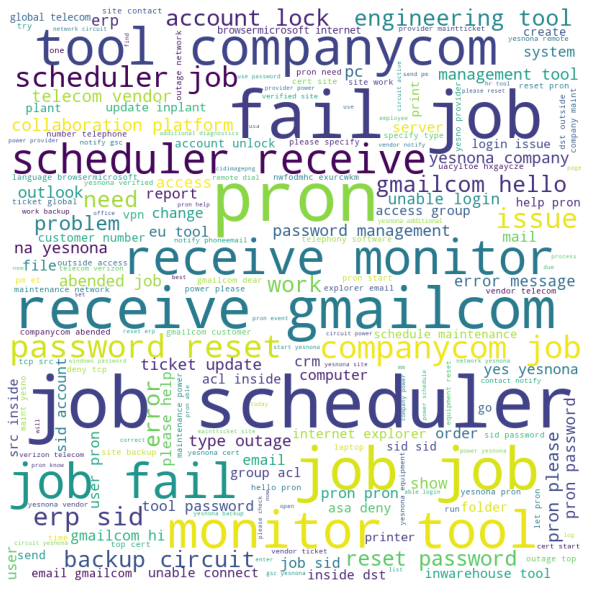

In [18]:
import matplotlib.pyplot as plt

wordcloud
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

# Implementing Models

In [19]:
embedding_size= 60
window_size= 40
min_word= 5
down_sampling= 1e-2

In [20]:
from gensim.models.fasttext import FastText


# Words variable contains all the text in Combined Description

In [21]:
Words

"login issue verify user detail employee manager name check the user name in ad and reset the password advise the user to login and check caller confirm that -pron- be able to login issue resolve outlook receive from gmailcom hello team -pron- meetingsskype meeting etc be not appear in -pron- outlook calendar can somebody please advise how to correct this kind can not log in to vpn receive from gmailcom hi i can not log on to vpn best unable to access hr tool page unable to access hr tool page skype error skype error unable to log in to engineering tool and skype unable to log in to engineering tool and skype ticket no employment status new non employee enter user name ticket no employment status new non employee enter user name unable to disable add in on outlook unable to disable add in on outlook ticket update on inplant ticket update on inplant engineering tool say not connect and unable to submit report engineering tool say not connect and unable to submit report hr tool site not 

In [25]:
import nltk
from nltk import WordPunctTokenizer
word_punctuation_tokenizer = nltk.WordPunctTokenizer()
word_tokenized_corpus = [word_punctuation_tokenizer.tokenize(Words)]

In [26]:
word_tokenized_corpus

[['login',
  'issue',
  'verify',
  'user',
  'detail',
  'employee',
  'manager',
  'name',
  'check',
  'the',
  'user',
  'name',
  'in',
  'ad',
  'and',
  'reset',
  'the',
  'password',
  'advise',
  'the',
  'user',
  'to',
  'login',
  'and',
  'check',
  'caller',
  'confirm',
  'that',
  '-',
  'pron',
  '-',
  'be',
  'able',
  'to',
  'login',
  'issue',
  'resolve',
  'outlook',
  'receive',
  'from',
  'gmailcom',
  'hello',
  'team',
  '-',
  'pron',
  '-',
  'meetingsskype',
  'meeting',
  'etc',
  'be',
  'not',
  'appear',
  'in',
  '-',
  'pron',
  '-',
  'outlook',
  'calendar',
  'can',
  'somebody',
  'please',
  'advise',
  'how',
  'to',
  'correct',
  'this',
  'kind',
  'can',
  'not',
  'log',
  'in',
  'to',
  'vpn',
  'receive',
  'from',
  'gmailcom',
  'hi',
  'i',
  'can',
  'not',
  'log',
  'on',
  'to',
  'vpn',
  'best',
  'unable',
  'to',
  'access',
  'hr',
  'tool',
  'page',
  'unable',
  'to',
  'access',
  'hr',
  'tool',
  'page',
  'skype',


# FastText for Semantic Analysis

In [27]:
%%time
ft_model = FastText(word_tokenized_corpus,
                     size=embedding_size,
                      window=window_size,
                      min_count=min_word,
                      sample=down_sampling,
                     sg=1,
                      iter=100)
 # sg means type of mode.sg=1 skip gram model


CPU times: user 1min 53s, sys: 221 ms, total: 1min 53s
Wall time: 1min 54s


In [28]:
print(ft_model.wv['account'])


[-0.06399482  0.48377237  0.34206137 -0.25783792  0.06017518 -0.33147013
 -0.32582292 -0.36774474  0.33693936  0.27706724  0.36064777  0.78622967
  0.50092125  0.33433652 -0.50799066 -0.81163806  0.12686637  0.08955316
  0.08145101  0.12244033 -0.26618418  0.6289483  -0.71784925 -0.5950027
 -0.3145382  -0.00746182 -0.32993692  0.02365847 -0.16169205  0.44260812
 -0.6990093   0.22828864  0.4655486   0.15288173 -0.03638203 -0.13974632
  0.21007428 -0.12836756 -0.5854062  -0.3642437   0.02751997  0.3887399
  0.45711896 -0.4252947  -0.36714375  0.19850913 -0.05038841 -0.01734925
 -0.01752048 -0.2147251  -0.28258204  0.24662167 -0.02132316 -0.02355998
  0.42729378  0.2948924  -0.63436013 -0.13281728 -0.38097787 -0.34381858]


In [29]:
semantically_similar_words = {words: [item[0] for item in ft_model.wv.most_similar([words], topn=5)]
                  for words in ['account', 'login', 'password', 'reset', 'ticket', 'install']}

for k,v in semantically_similar_words.items():
    print(k+":"+str(v))

account:['lock', 'accout', 'count', 'locky', 'discount']
login:['to', 'logic', 'issue', 'logistics', 'verified']
password:['passwords', 'reset', 'passwarter', 'pass', 'to']
reset:['password', 'passwords', 'sid', 'erp', 'for']
ticket:['maintticket', 'update', 'inplant', 'packet', 'ticketing']
install:['uninstalle', 'reinstall', 'instead', 'across', 'acrobat']


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [30]:
print(ft_model.wv.similarity(w1='login', w2='password'))

0.66274315


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [31]:
print(ft_model.wv.similarity(w1='login', w2='schedule'))

0.5404263


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [32]:
from sklearn.decomposition import PCA

all_similar_words = sum([[k] + v for k, v in semantically_similar_words.items()], [])

print(all_similar_words)
print(type(all_similar_words))
print(len(all_similar_words))

['account', 'lock', 'accout', 'count', 'locky', 'discount', 'login', 'to', 'logic', 'issue', 'logistics', 'verified', 'password', 'passwords', 'reset', 'passwarter', 'pass', 'to', 'reset', 'password', 'passwords', 'sid', 'erp', 'for', 'ticket', 'maintticket', 'update', 'inplant', 'packet', 'ticketing', 'install', 'uninstalle', 'reinstall', 'instead', 'across', 'acrobat']
<class 'list'>
36


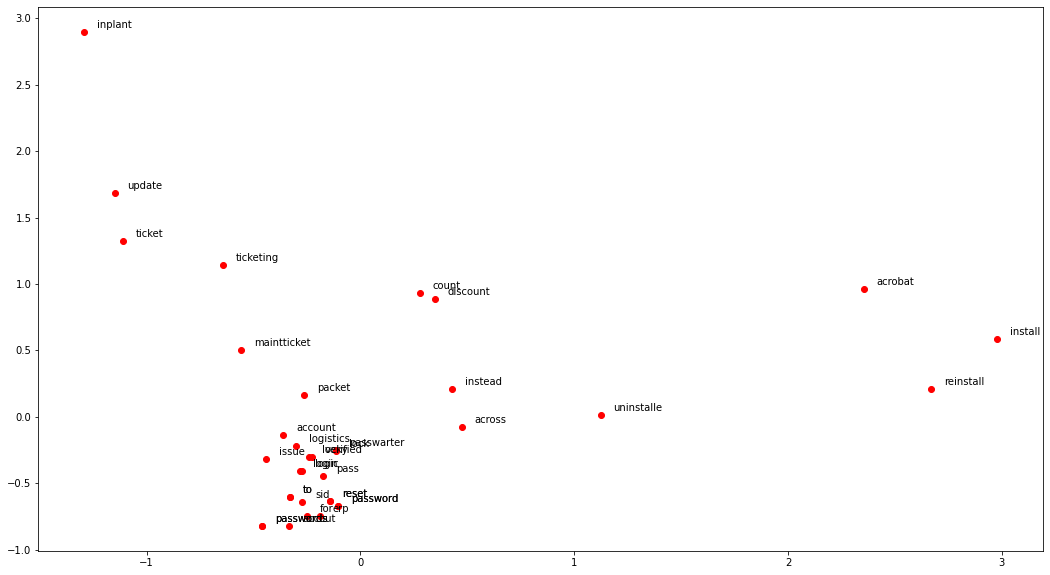

In [33]:
word_vectors = ft_model.wv[all_similar_words]

pca = PCA(n_components=2)

p_comps = pca.fit_transform(word_vectors)
word_names = all_similar_words

plt.figure(figsize=(18, 10))
plt.scatter(p_comps[:, 0], p_comps[:, 1], c='red')

for word_names, x, y in zip(word_names, p_comps[:, 0], p_comps[:, 1]):
    plt.annotate(word_names, xy=(x+0.06, y+0.03), xytext=(0, 0), textcoords='offset points')

# The words those have simillar meaning or related are neighbours and words those are not related or have  opposite meaning, have more distance between them.


# FastText Model Building and Finding Precison and Recall

In [51]:
!pip install fasttext

In [52]:
!wget https://github.com/facebookresearch/fastText/archive/v0.1.0.zip

--2020-09-14 07:29:27--  https://github.com/facebookresearch/fastText/archive/v0.1.0.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/facebookresearch/fastText/zip/v0.1.0 [following]
--2020-09-14 07:29:28--  https://codeload.github.com/facebookresearch/fastText/zip/v0.1.0
Resolving codeload.github.com (codeload.github.com)... 140.82.114.9
Connecting to codeload.github.com (codeload.github.com)|140.82.114.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘v0.1.0.zip’

v0.1.0.zip              [  <=>               ]  92.06K   172KB/s    in 0.5s    

2020-09-14 07:29:29 (172 KB/s) - ‘v0.1.0.zip’ saved [94267]



In [53]:
!unzip v0.1.0.zip

Archive:  v0.1.0.zip
431c9e2a9b5149369cc60fb9f5beba58dcf8ca17
   creating: fastText-0.1.0/
  inflating: fastText-0.1.0/.gitignore  
  inflating: fastText-0.1.0/CONTRIBUTING.md  
  inflating: fastText-0.1.0/LICENSE  
  inflating: fastText-0.1.0/Makefile  
  inflating: fastText-0.1.0/PATENTS  
  inflating: fastText-0.1.0/README.md  
  inflating: fastText-0.1.0/classification-example.sh  
  inflating: fastText-0.1.0/classification-results.sh  
  inflating: fastText-0.1.0/eval.py  
  inflating: fastText-0.1.0/get-wikimedia.sh  
  inflating: fastText-0.1.0/pretrained-vectors.md  
  inflating: fastText-0.1.0/quantization-example.sh  
  inflating: fastText-0.1.0/quantization-results.sh  
   creating: fastText-0.1.0/src/
  inflating: fastText-0.1.0/src/args.cc  
  inflating: fastText-0.1.0/src/args.h  
  inflating: fastText-0.1.0/src/dictionary.cc  
  inflating: fastText-0.1.0/src/dictionary.h  
  inflating: fastText-0.1.0/src/fasttext.cc  
  inflating: fastText-0.1.0/src/fasttext.h  
  inflat

In [54]:
%cd fastText-0.1.0
!make

/content/fastText-0.1.0/fastText-0.1.0
c++ -pthread -std=c++0x -O3 -funroll-loops -c src/args.cc
c++ -pthread -std=c++0x -O3 -funroll-loops -c src/dictionary.cc
c++ -pthread -std=c++0x -O3 -funroll-loops -c src/productquantizer.cc
c++ -pthread -std=c++0x -O3 -funroll-loops -c src/matrix.cc
c++ -pthread -std=c++0x -O3 -funroll-loops -c src/qmatrix.cc
c++ -pthread -std=c++0x -O3 -funroll-loops -c src/vector.cc
c++ -pthread -std=c++0x -O3 -funroll-loops -c src/model.cc
c++ -pthread -std=c++0x -O3 -funroll-loops -c src/utils.cc
c++ -pthread -std=c++0x -O3 -funroll-loops -c src/fasttext.cc
c++ -pthread -std=c++0x -O3 -funroll-loops args.o dictionary.o productquantizer.o matrix.o qmatrix.o vector.o model.o utils.o fasttext.o src/main.cc -o fasttext


In [55]:
!./fasttext

usage: fasttext <command> <args>

The commands supported by fasttext are:

  supervised              train a supervised classifier
  quantize                quantize a model to reduce the memory usage
  test                    evaluate a supervised classifier
  predict                 predict most likely labels
  predict-prob            predict most likely labels with probabilities
  skipgram                train a skipgram model
  cbow                    train a cbow model
  print-word-vectors      print word vectors given a trained model
  print-sentence-vectors  print sentence vectors given a trained model
  nn                      query for nearest neighbors
  analogies               query for analogies



In [56]:
df_copy_Refined_Data.shape

(8408, 12)

In [57]:
from io import StringIO
import csv

col = ['Assignment group', 'Combined Description']
df_copy_FastText=df_copy_Refined_Data[col]
df_copy_FastText['Assignment group']=['__label__'+ s for s in df_copy_Refined_Data['Assignment group']]

df_copy_FastText.to_csv(r'/content/drive/My Drive/CapstoneProjectData/AutomaticTicketSystem_updated.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [58]:
from sklearn import model_selection
train_x, test_x, train_y, test_y = model_selection.train_test_split(df_copy_Refined_Data['Combined Description'], df_copy_Refined_Data['Assignment group'], test_size=0.10, random_state=42)

In [59]:
!head -n 7000 "/content/drive/My Drive/CapstoneProjectData/AutomaticTicketSystem_updated.txt" > "/content/drive/My Drive/CapstoneProjectData/AutomaticTicketSystem_updated_train.txt"
!tail -n 1408  "/content/drive/My Drive/CapstoneProjectData/AutomaticTicketSystem_updated.txt" > "/content/drive/My Drive/CapstoneProjectData/AutomaticTicketSystem_updated_test.txt"

In [63]:
# import fasttext
# model = fasttext.train_supervised('/content/drive/My Drive/CapstoneProjectData/AutomaticTicketSystem_updated_train.txt')

In [64]:
# print(model.words) 

In [65]:
# def print_results(N, p, r):
#     print("N\t" + str(N))
#     print("P@{}\t{:.3f}".format(1, p))
#     print("R@{}\t{:.3f}".format(1, r))

# print_results(*model.test('/content/drive/My Drive/CapstoneProjectData/AutomaticTicketSystem_updated_test.txt'))

In [66]:
%%time
!./fasttext supervised -input "/content/drive/My Drive/CapstoneProjectData/AutomaticTicketSystem_updated.txt" -output model_Automatic_Ticket_System

Read 0M words
Number of words:  11883
Number of labels: 74
Progress: 100.0%  words/sec/thread: 905037  lr: 0.000000  loss: 2.011848  eta: 0h0m 
CPU times: user 31.9 ms, sys: 22.1 ms, total: 53.9 ms
Wall time: 3.48 s


In [67]:
!ls

args.o				   model.o
classification-example.sh	   PATENTS
classification-results.sh	   pretrained-vectors.md
CONTRIBUTING.md			   productquantizer.o
dictionary.o			   qmatrix.o
eval.py				   quantization-example.sh
fasttext			   quantization-results.sh
fasttext.o			   README.md
get-wikimedia.sh		   src
LICENSE				   tutorials
Makefile			   utils.o
matrix.o			   vector.o
model_Automatic_Ticket_System.bin  wikifil.pl
model_Automatic_Ticket_System.vec  word-vector-example.sh


In [68]:

# model_Automatic_Ticket_System.bin 
!./fasttext test model_Automatic_Ticket_System.bin "/content/drive/My Drive/CapstoneProjectData/AutomaticTicketSystem_updated_test.txt"

N	1408
P@1	0.575
R@1	0.575
Number of examples: 1408


In [69]:

!ls

args.o				   model.o
classification-example.sh	   PATENTS
classification-results.sh	   pretrained-vectors.md
CONTRIBUTING.md			   productquantizer.o
dictionary.o			   qmatrix.o
eval.py				   quantization-example.sh
fasttext			   quantization-results.sh
fasttext.o			   README.md
get-wikimedia.sh		   src
LICENSE				   tutorials
Makefile			   utils.o
matrix.o			   vector.o
model_Automatic_Ticket_System.bin  wikifil.pl
model_Automatic_Ticket_System.vec  word-vector-example.sh


# Precision and Recall of 57% is coming.

In next milestone we will do the model tuning by running epochs and testing on top 50 or top 10 groups.

# Re Running model on Top 10 groups

In [82]:
top_10_grp= list(df_copy_Refined_Data.groupby('Assignment group').size().\
                 reset_index().\
                 sort_values(by=0,ascending=False)[:10]['Assignment group'])
            
top_10_grp
            

['GRP_0',
 'GRP_8',
 'GRP_24',
 'GRP_12',
 'GRP_9',
 'GRP_2',
 'GRP_19',
 'GRP_3',
 'GRP_6',
 'GRP_13']

In [83]:
df_top_10=df_copy_Refined_Data[df_copy_Refined_Data['Assignment group'].isin(top_10_grp)]
df_top_10

,Unnamed: 0,Short description,Description,Caller,Assignment group,Combined Description,word_counts,char counts,stop_words_len,stop_words,language,language_check
0,0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue verify user detail employee manage...,35,218,12,"['the', 'name', 'in', 'and', 'the', 'the', 'to...",en,en
1,1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook receive from gmailcom hello team -PR...,26,202,9,"['my', 'are', 'not', 'in', 'my', 'can', 'pleas...",en,en
2,2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,can not log in to vpn receive from gmailcom ...,16,106,6,"['in', 'to', 'i', 'cannot', 'on', 'to']",en,en
3,3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr tool page unable to access...,10,59,2,"['to', 'to']",en,en
4,4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,4,25,0,[],no,no
...,...,...,...,...,...,...,...,...,...,...,...,...
8397,8489,account locked,account locked,sdvlxbfe ptnahjkw,GRP_0,account lock account lock,4,29,0,[],en,en
8400,8492,hr_tool etime option not visitble,hr_tool etime option not visitble,tmopbken ibzougsd,GRP_0,hr tool etime option not visitble hr tool etim...,10,69,2,"['not', 'not']",en,en
8402,8494,tablet needs reimaged due to multiple issues w...,tablet needs reimaged due to multiple issues w...,cpmaidhj elbaqmtp,GRP_3,tablet need reimage due to multiple issue with...,22,125,6,"['due', 'to', 'with', 'due', 'to', 'with']",en,en
8404,8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0,telephony software issue telephony software issue,4,49,0,[],en,en


In [85]:
# shuffle the dataframe
df_top_10=df_top_10.sample(frac=1)
df_top_10

,Unnamed: 0,Short description,Description,Caller,Assignment group,Combined Description,word_counts,char counts,stop_words_len,stop_words,language,language_check
3607,3634,requesting un-install and re-install of excel ...,"i am currently running into issues with my ""co...",ferxqvsm esmwxqlf,GRP_0,request un install and re install of excel i b...,53,302,27,"['and', 'of', 'i', 'am', 'into', 'with', 'my',...",en,en
5108,5158,vip 2 -when i try to access the ethics trainin...,this happens if i log in via public internet a...,dxyvfuhr uyfqgomx,GRP_0,vip when i try to access the ethic training li...,37,194,14,"['i', 'to', 'the', 'i', 'an', 'not', 'this', '...",en,en
7408,7493,drive encryption attention needed,drive encryption attention needed,mwjcsiug fbwthoca,GRP_0,drive encryption attention need drive encrypti...,8,67,0,[],en,en
3480,3506,:i am trying to find an expense report to appr...,name:bonhyb knepkhsw\nlanguage:\nbrowser:micro...,xziwkgeo gdiraveu,GRP_0,i be try to find an expense report to approve ...,62,378,31,"['am', 'to', 'an', 'to', 'i', 'have', 'an', 't...",en,en
864,870,"design pane not showing up in ""analysis for ms...","hello,\r\n\r\nwhen i use analysis for ms excel...",entuakhp xrnhtdmk,GRP_0,design pane not show up in analysis for ms exc...,68,361,31,"['not', 'up', 'in', 'for', 'when', 'i', 'for',...",en,en
...,...,...,...,...,...,...,...,...,...,...,...,...
2353,2367,erp gui is missing login options for xhaomnjl ...,erp gui is missing login options for xhaomnjl ...,olckhmvx pcqobjnd,GRP_0,erp gui be miss login option for xhaomnjl ctus...,18,109,4,"['is', 'for', 'is', 'for']",en,en
6456,6532,unable to login to erp SID_34,unable to login to erp SID_34,wjsfbpuv lcpdfihr,GRP_0,unable to login to erp sid unable to login to ...,12,59,4,"['to', 'to', 'to', 'to']",it,it
6924,7006,account information updated,"hi,\r\n\r\none more spam mail. please check.\r...",vrjwyqtf qoxkapfw,GRP_0,account information update hi one more spam ma...,10,72,3,"['one', 'more', 'please']",en,en
6643,6721,user not able to connect to t drive,user not able to connect to t drive,crkdjbot qiztrxne,GRP_0,user not able to connect to t drive user not a...,16,73,6,"['not', 'to', 'to', 'not', 'to', 'to']",en,en


# Executing FastText on top 10 groups

In [86]:
from io import StringIO
import csv

col = ['Assignment group', 'Combined Description']
df_copy_FastText_Top10Groups=df_top_10[col]
df_copy_FastText_Top10Groups['Assignment group']=['__label__'+ s for s in df_top_10['Assignment group']]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [89]:
df_copy_FastText_Top10Groups.shape

(6349, 2)

In [90]:
 df_copy_FastText_Top10Groups.to_csv(r'/content/drive/My Drive/CapstoneProjectData/AutomaticTicketSystem_updatedTop10Groups.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")

# Splitting Train and Test Data for Top 10 Groups

In [91]:
!head -n 5349 "/content/drive/My Drive/CapstoneProjectData/AutomaticTicketSystem_updatedTop10Groups.txt" > "/content/drive/My Drive/CapstoneProjectData/AutomaticTicketSystem_updated_Top10Groups_train.txt"
!tail -n 1000  "/content/drive/My Drive/CapstoneProjectData/AutomaticTicketSystem_updatedTop10Groups.txt" > "/content/drive/My Drive/CapstoneProjectData/AutomaticTicketSystem_updated_Top10Groups_test.txt"


# Splitting Train and Test Data for Top 10 Groups

In [92]:
# from sklearn import model_selection
# train_top10Groups_x, test_top10Groups_x, train_top10Groups_y, test_top10Groups_y = model_selection.train_test_split(df_copy_FastText_Top10Groups['Combined Description'], df_copy_FastText_Top10Groups['Assignment group'], test_size=0.10, random_state=42)

In [94]:
%%time
!./fasttext supervised -input "/content/drive/My Drive/CapstoneProjectData/AutomaticTicketSystem_updated_Top10Groups_train.txt" -output model_Automatic_Ticket_System_Top10Groups

Read 0M words
Number of words:  7807
Number of labels: 10
Progress: 100.0%  words/sec/thread: 2430731  lr: 0.000000  loss: 0.890004  eta: 0h0m 
CPU times: user 11.6 ms, sys: 13 ms, total: 24.7 ms
Wall time: 942 ms


# Testing the model

In [95]:
!ls

args.o
classification-example.sh
classification-results.sh
CONTRIBUTING.md
dictionary.o
eval.py
fasttext
fasttext.o
get-wikimedia.sh
LICENSE
Makefile
matrix.o
model_Automatic_Ticket_System.bin
model_Automatic_Ticket_System_Top10Groups.bin
model_Automatic_Ticket_System_Top10Groups.vec
model_Automatic_Ticket_System.vec
model.o
PATENTS
pretrained-vectors.md
productquantizer.o
qmatrix.o
quantization-example.sh
quantization-results.sh
README.md
src
tutorials
utils.o
vector.o
wikifil.pl
word-vector-example.sh


In [96]:
# model_Automatic_Ticket_System_Top10Groups.bin
!./fasttext test model_Automatic_Ticket_System_Top10Groups.bin "/content/drive/My Drive/CapstoneProjectData/AutomaticTicketSystem_updated_Top10Groups_test.txt"


N	1000
P@1	0.748
R@1	0.748
Number of examples: 1000


# Precision and Recall has improved and reached to 74 % with top 10 groups.


*   Next we will work on epochs and lerning rate
*   List item



In [101]:
%%time
!./fasttext supervised -input "/content/drive/My Drive/CapstoneProjectData/AutomaticTicketSystem_updated_Top10Groups_train.txt" -output model_Automatic_Ticket_System_Top10Groups -lr 1.0 -epoch 50

Read 0M words
Number of words:  7807
Number of labels: 10
Progress: 100.0%  words/sec/thread: 2571268  lr: 0.000000  loss: 0.283468  eta: 0h0m 
CPU times: user 34.4 ms, sys: 26.1 ms, total: 60.4 ms
Wall time: 2.35 s


In [102]:
# model_Automatic_Ticket_System_Top10Groups.bin
!./fasttext test model_Automatic_Ticket_System_Top10Groups.bin "/content/drive/My Drive/CapstoneProjectData/AutomaticTicketSystem_updated_Top10Groups_test.txt"


N	1000
P@1	0.81
R@1	0.81
Number of examples: 1000


# With Epoch-50 and lr=1.0,Precision and recall increases to 81 %

# Further Optimizing

In [103]:
%%time
!./fasttext supervised -input "/content/drive/My Drive/CapstoneProjectData/AutomaticTicketSystem_updated_Top10Groups_train.txt" -output model_Automatic_Ticket_System_Top10Groups -lr 0.5 -epoch 25 -wordNgrams 2 -bucket 200000 -dim 50 -loss one-vs-all


Unknown loss: one-vs-all

The following arguments are mandatory:
  -input              training file path
  -output             output file path

The following arguments are optional:
  -verbose            verbosity level [2]

The following arguments for the dictionary are optional:
  -minCount           minimal number of word occurences [1]
  -minCountLabel      minimal number of label occurences [0]
  -wordNgrams         max length of word ngram [2]
  -bucket             number of buckets [200000]
  -minn               min length of char ngram [0]
  -maxn               max length of char ngram [0]
  -t                  sampling threshold [0.0001]
  -label              labels prefix [__label__]

The following arguments for training are optional:
  -lr                 learning rate [0.5]
  -lrUpdateRate       change the rate of updates for the learning rate [100]
  -dim                size of word vectors [50]
  -ws                 size of the context window [5]
  -epoch              n

In [104]:
# model_Automatic_Ticket_System_Top10Groups.bin
!./fasttext test model_Automatic_Ticket_System_Top10Groups.bin "/content/drive/My Drive/CapstoneProjectData/AutomaticTicketSystem_updated_Top10Groups_test.txt"


N	1000
P@1	0.81
R@1	0.81
Number of examples: 1000


# Now we will train and test our model on Top 5 Groups and with hyperparameter tuning

# Find Top 5 Groups Data

In [105]:
top_5_grp= list(df_copy_Refined_Data.groupby('Assignment group').size().\
                 reset_index().\
                 sort_values(by=0,ascending=False)[:5]['Assignment group'])

In [106]:
df_top_5=df_copy_Refined_Data[df_copy_Refined_Data['Assignment group'].isin(top_5_grp)]
df_top_5


,Unnamed: 0,Short description,Description,Caller,Assignment group,Combined Description,word_counts,char counts,stop_words_len,stop_words,language,language_check
0,0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue verify user detail employee manage...,35,218,12,"['the', 'name', 'in', 'and', 'the', 'the', 'to...",en,en
1,1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook receive from gmailcom hello team -PR...,26,202,9,"['my', 'are', 'not', 'in', 'my', 'can', 'pleas...",en,en
2,2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,can not log in to vpn receive from gmailcom ...,16,106,6,"['in', 'to', 'i', 'cannot', 'on', 'to']",en,en
3,3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr tool page unable to access...,10,59,2,"['to', 'to']",en,en
4,4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,4,25,0,[],no,no
...,...,...,...,...,...,...,...,...,...,...,...,...
8396,8488,erp account unlock,name:mfeyouli ndobtzpw\nlanguage:\nbrowser:mic...,rbozivdq gmlhrtvp,GRP_0,erp account unlock name language browsermicr...,22,216,2,"['for', 'name']",en,en
8397,8489,account locked,account locked,sdvlxbfe ptnahjkw,GRP_0,account lock account lock,4,29,0,[],en,en
8400,8492,hr_tool etime option not visitble,hr_tool etime option not visitble,tmopbken ibzougsd,GRP_0,hr tool etime option not visitble hr tool etim...,10,69,2,"['not', 'not']",en,en
8404,8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0,telephony software issue telephony software issue,4,49,0,[],en,en


In [107]:
from io import StringIO
import csv

col = ['Assignment group', 'Combined Description']
df_copy_FastText_Top5Groups=df_top_5[col]
df_copy_FastText_Top5Groups['Assignment group']=['__label__'+ s for s in df_top_5['Assignment group']]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [108]:
df_copy_FastText_Top5Groups.shape

(5365, 2)

In [110]:
 df_copy_FastText_Top5Groups.to_csv(r'/content/drive/My Drive/CapstoneProjectData/AutomaticTicketSystem_updatedTop5Groups.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")

In [111]:
!head -n 4700 "/content/drive/My Drive/CapstoneProjectData/AutomaticTicketSystem_updatedTop5Groups.txt" > "/content/drive/My Drive/CapstoneProjectData/AutomaticTicketSystem_updated_Top5Groups_train.txt"
!tail -n 665  "/content/drive/My Drive/CapstoneProjectData/AutomaticTicketSystem_updatedTop5Groups.txt" > "/content/drive/My Drive/CapstoneProjectData/AutomaticTicketSystem_updated_Top5Groups_test.txt"


In [126]:
%%time
!./fasttext supervised -input "/content/drive/My Drive/CapstoneProjectData/AutomaticTicketSystem_updated_Top5Groups_train.txt" -output model_Automatic_Ticket_System_Top5Groups -lr 0.8 -epoch 50 -wordNgrams 2 -bucket 200000 -dim 50 

Read 0M words
Number of words:  5849
Number of labels: 5
Progress: 100.0%  words/sec/thread: 2040802  lr: 0.000000  loss: 0.094210  eta: 0h0m 
CPU times: user 83.9 ms, sys: 25.8 ms, total: 110 ms
Wall time: 2.33 s


In [127]:
!ls

args.o
classification-example.sh
classification-results.sh
CONTRIBUTING.md
dictionary.o
eval.py
fasttext
fasttext.o
get-wikimedia.sh
LICENSE
Makefile
matrix.o
model_Automatic_Ticket_System.bin
model_Automatic_Ticket_System_Top10Groups.bin
model_Automatic_Ticket_System_Top10Groups.vec
model_Automatic_Ticket_System_Top5Groups.bin
model_Automatic_Ticket_System_Top5Groups.vec
model_Automatic_Ticket_System.vec
model.o
PATENTS
pretrained-vectors.md
productquantizer.o
qmatrix.o
quantization-example.sh
quantization-results.sh
README.md
src
tutorials
utils.o
vector.o
wikifil.pl
word-vector-example.sh


In [128]:
!./fasttext test model_Automatic_Ticket_System_Top5Groups.bin "/content/drive/My Drive/CapstoneProjectData/AutomaticTicketSystem_updated_Top5Groups_test.txt"


N	665
P@1	0.904
R@1	0.904
Number of examples: 665


# Increasing lr,epoch and word n gram has not impacted much in change of Precision and recall

# SVM

In [ ]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import  numpy, textblob, string
#from keras.preprocessing import text, sequence
#from keras import layers, models, optimizers

## split the data into Train and Text (0.75)

train_x, test_x, train_y, test_y = model_selection.train_test_split(df_copy['Combined Description'], df_copy['Assignment group'], test_size=0.25, random_state=42)

In [ ]:
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
test_y = encoder.fit_transform(test_y)

In [ ]:
tfidf_vect = TfidfVectorizer(min_df=5 ,use_idf=True,analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(df_copy['Combined Description'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(test_x)

In [ ]:
print(tfidf_vect.vocabulary_)

{'login': 1209, 'issue': 1097, 'verify': 2255, 'user': 2229, 'detail': 541, 'employee': 681, 'manager': 1251, 'name': 1360, 'check': 338, 'the': 2101, 'in': 1024, 'ad': 37, 'and': 104, 'reset': 1768, 'password': 1513, 'advise': 54, 'to': 2129, 'caller': 301, 'confirm': 403, 'that': 2099, 'pron': 1641, 'be': 218, 'able': 10, 'resolve': 1770, 'outlook': 1484, 'receive': 1707, 'from': 862, 'gmailcom': 901, 'hello': 952, 'team': 2075, 'meeting': 1285, 'etc': 726, 'not': 1402, 'appear': 125, 'calendar': 299, 'can': 302, 'please': 1569, 'how': 980, 'correct': 432, 'this': 2109, 'kind': 1130, 'log': 1207, 'vpn': 2292, 'hi': 962, 'i': 998, 'on': 1442, 'best': 238, 'unable': 2185, 'access': 19, 'hr': 986, 'tool': 2135, 'page': 1498, 'skype': 1931, 'error': 714, 'engineering': 696, 'event': 738, 'companycom': 376, 'value': 2245, 'of': 1431, 'threshold': 2115, 'for': 838, 'ticket': 2120, 'no': 1391, 'employment': 682, 'status': 1999, 'new': 1382, 'non': 1395, 'enter': 701, 'disable': 576, 'add': 

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    pred_prob = classifier.predict_proba(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    #return metrics.accuracy_score(predictions, test_y)
    return predictions,pred_prob


def cal_accuracy(model_name, y_test, y_pred): 

    print ("############  Model Used: ",model_name, " ####################")
    print("Confusion Matrix:\n ", 
        metrics.confusion_matrix(y_test, y_pred)) 
      
    print ("Accuracy : ", 
    metrics.accuracy_score(y_test,y_pred)*100) 
    
    print("Recall: {:.2f}".format(metrics.recall_score(y_test, y_pred,average='micro')))
    print("Precision: {:.2f}".format(metrics.precision_score(y_test, y_pred,average='micro')))
      
    print("Report : ", 
    metrics.classification_report(y_test, y_pred))

In [ ]:
model_name = "SVM"
pred_result = train_model(svm.SVC(probability=True), xtrain_tfidf, train_y, xvalid_tfidf)
svm.SVC(probability=True)
cal_accuracy (model_name,test_y, pred_result)

############  Model Used:  SVM  ####################


ValueError: ignored


# SVM Metrics
Accuracy :  56 %

Recall: 56 %

Precision: 56 %

# Naive Bayes

In [ ]:
# # fit the training dataset on the NB classifier
# Naive = naive_bayes.MultinomialNB()
# Naive.fit(xtrain_tfidf,Train_Y)
# xtrain_tfidf

model_name = "Naive Bayes"
pred_result = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, train_y, xvalid_tfidf)
naive_bayes.MultinomialNB()
cal_accuracy (model_name,test_y, pred_result)

############  Model Used:  Naive Bayes  ####################
Confusion Matrix:
  [[980   0   0 ...   0   0   0]
 [  5   0   0 ...   0   0   2]
 [ 15   0   0 ...   0   0  17]
 ...
 [  8   0   0 ...   0   0 154]
 [ 14   0   0 ...   0   0  49]
 [  0   0   0 ...   0   0   0]]
Accuracy :  50.95147478591817
Recall: 0.51
Precision: 0.51
Report :                precision    recall  f1-score   support

           0       0.59      0.99      0.74       990
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00        32
           3       0.00      0.00      0.00         9
           4       0.54      0.22      0.31        60
           5       0.00      0.00      0.00        44
           6       1.00      0.03      0.06        34
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00        18
           9       0.00      0.00      0.00        16
          10       0.00      0.00      0.00        20
         

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Naive Bayes Metrics

Accuracy :  50 %

Recall: 50 %

Precision: 50 %

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rawClf=RandomForestClassifier(n_estimators=100,bootstrap=True,max_features='sqrt')
rawClf.fit(xtrain_tfidf,train_y)
y_pred=rawClf.predict(xvalid_tfidf)


In [ ]:
print("Accuracy:",metrics.accuracy_score(test_y, y_pred)*100)

Accuracy: 56.04186489058039


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(test_y,y_pred))
print(classification_report(test_y,y_pred))
print(accuracy_score(test_y, y_pred))


[[969   0   0 ...   1   0   0]
 [  3   0   0 ...   0   1   0]
 [ 14   0  13 ...   0   3   1]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
              precision    recall  f1-score   support

           0       0.65      0.98      0.78       990
           1       0.00      0.00      0.00         9
           2       0.93      0.41      0.57        32
           3       0.00      0.00      0.00         9
           4       0.57      0.42      0.48        60
           5       0.77      0.23      0.35        44
           6       0.73      0.24      0.36        34
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00        18
           9       0.92      0.75      0.83        16
          10       0.50      0.10      0.17        20
          11       0.86      0.12      0.21        51
          12       0.71      0.29      0.41        69
          13       0.00      0.00      0.00        

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Random Forest
Accuracy: 56%

      Precision   Recall    F1 Score
      51 %        55 %      48 %     

# LSTM 

In [ ]:
max_features = 40000
maxlen = 250
embedding_size = 200



In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer(num_words=max_features)

In [ ]:
tokenizer.fit_on_texts(df_copy['Combined Description'].values)
sequences = tokenizer.texts_to_sequences(df_copy['Combined Description'].values)

In [ ]:
import tensorflow as tf
import numpy as np
X=tf.keras.preprocessing.sequence.pad_sequences(
sequences, maxlen=maxlen)
# Target column to numpy array
y=np.array(y)
type(y)

numpy.ndarray

In [ ]:
tokenizer.word_index

{'to': 1,
 'pron': 2,
 'be': 3,
 'the': 4,
 'in': 5,
 'job': 6,
 'not': 7,
 'from': 8,
 'a': 9,
 'on': 10,
 'tool': 11,
 'and': 12,
 'for': 13,
 'receive': 14,
 'password': 15,
 'i': 16,
 'at': 17,
 'please': 18,
 'erp': 19,
 'have': 20,
 'scheduler': 21,
 'gmailcom': 22,
 'of': 23,
 'fail': 24,
 'sid': 25,
 'user': 26,
 'yesnona': 27,
 'reset': 28,
 'this': 29,
 'issue': 30,
 'unable': 31,
 'access': 32,
 'can': 33,
 'do': 34,
 'account': 35,
 'no': 36,
 'company': 37,
 'work': 38,
 'with': 39,
 'ticket': 40,
 'companycom': 41,
 'monitor': 42,
 'error': 43,
 'need': 44,
 'hostname': 45,
 'email': 46,
 'outlook': 47,
 'would': 48,
 'login': 49,
 'that': 50,
 'site': 51,
 'help': 52,
 'get': 53,
 'as': 54,
 'system': 55,
 'update': 56,
 'when': 57,
 'e': 58,
 'circuit': 59,
 'power': 60,
 'lock': 61,
 'network': 62,
 'name': 63,
 'use': 64,
 'change': 65,
 'hello': 66,
 'an': 67,
 'vendor': 68,
 'but': 69,
 'event': 70,
 'or': 71,
 'if': 72,
 'server': 73,
 'connect': 74,
 'by': 75,
 'd

# Set number of words

In [ ]:
num_words = len(tokenizer.word_index) + 1
print(num_words)

13110


# Create embedding matrix

In [ ]:
EMBEDDING_FILE = '/content/drive/My Drive/CapstoneProjectMainData/glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd

# create a weight matrix for words in training docs
embedding_matrix = np.zeros((num_words, 200))

for word, i in tokenizer.word_index.items():
	embedding_vector = embeddings.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

# Model Defining

In [ ]:
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import LSTM,Embedding,Dense,TimeDistributed,Dropout,Bidirectional,Lambda,Flatten,Input,Add
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras import backend as K
vocab_size=num_words

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size,embedding_size,weights=[embedding_matrix],trainable=True,input_length=maxlen))
#model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(74, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 250, 200)          2622000   
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               240800    
_________________________________________________________________
dense (Dense)                (None, 74)                14874     
Total params: 2,877,674
Trainable params: 2,877,674
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 250, 200)          2622000   
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               240800    
_________________________________________________________________
dense (Dense)                (None, 74)                14874     
Total params: 2,877,674
Trainable params: 2,877,674
Non-trainable params: 0
_________________________________________________________________


In [ ]:
Y = pd.get_dummies(df_copy['Assignment group']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (8408, 74)


In [ ]:
X.shape

(8408, 250)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(7567, 250) (7567, 74)
(841, 250) (841, 74)


In [ ]:
 history=model.fit(X_train, Y_train, epochs=10,batch_size=64,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/10
107/107 [==============================] - 196s 2s/step - loss: 2.3662 - accuracy: 0.5098 - val_loss: 2.0031 - val_accuracy: 0.5456
Epoch 2/10
107/107 [==============================] - 196s 2s/step - loss: 1.8132 - accuracy: 0.5740 - val_loss: 1.8299 - val_accuracy: 0.5746
Epoch 3/10
107/107 [==============================] - 207s 2s/step - loss: 1.6115 - accuracy: 0.6026 - val_loss: 1.7205 - val_accuracy: 0.5878
Epoch 4/10
107/107 [==============================] - 205s 2s/step - loss: 1.4134 - accuracy: 0.6405 - val_loss: 1.6068 - val_accuracy: 0.6024
Epoch 5/10
107/107 [==============================] - 204s 2s/step - loss: 1.2558 - accuracy: 0.6755 - val_loss: 1.5337 - val_accuracy: 0.6037
Epoch 6/10
107/107 [==============================] - 203s 2s/step - loss: 1.1288 - accuracy: 0.6957 - val_loss: 1.5005 - val_accuracy: 0.6196
Epoch 7/10
107/107 [==============================] - 201s 2s/step - loss: 0.9994 - accuracy: 0.7330 - val_loss: 1.4891 - val_accuracy: 0.6077

# Accuracy: 82 %

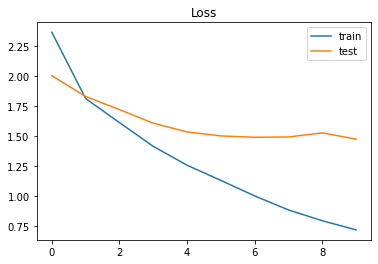

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

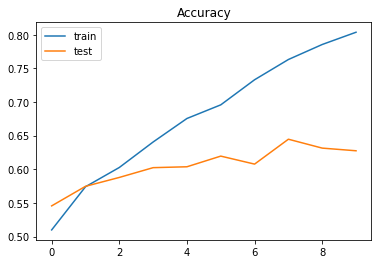

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

# Classifcation Report

In [ ]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1)
Y_true_classes = np.argmax(Y_test, axis = 1)

In [ ]:
Y_pred_classes[:5], Y_true_classes[:5]

(array([ 0, 72,  0,  0, 17]), array([ 5, 72, 12,  0, 17]))

In [ ]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(53)]
print(classification_report(Y_true_classes, Y_pred_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.81      0.91      0.86       391
     Class 1       0.00      0.00      0.00         6
     Class 2       0.56      0.56      0.56         9
     Class 3       0.00      0.00      0.00         5
     Class 4       0.50      0.57      0.53        23
     Class 5       0.57      0.47      0.52        17
     Class 6       0.20      0.46      0.28        13
     Class 7       0.00      0.00      0.00         1
     Class 8       0.00      0.00      0.00         4
     Class 9       0.75      0.75      0.75         4
    Class 10       0.33      0.14      0.20         7
    Class 11       0.55      0.24      0.33        25
    Class 12       0.55      0.61      0.58        28
    Class 13       0.00      0.00      0.00         4
    Class 14       0.00      0.00      0.00         3
    Class 15       0.50      0.33      0.40         3
    Class 16       0.00      0.00      0.00         2
    Class 17       0.95    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# End of Notebook